In [24]:
import pandas as pd

df = pd.read_csv("result.csv")
df = df.rename(columns={"N_Var":"n","Opt_Val":"f(x)"})

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        800 non-null    object 
 1   Problem          800 non-null    object 
 2   n                800 non-null    int64  
 3   Population_Size  800 non-null    int64  
 4   Max_Iteration    800 non-null    int64  
 5   f(x)             800 non-null    float64
 6   Runtime          800 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 43.9+ KB
None


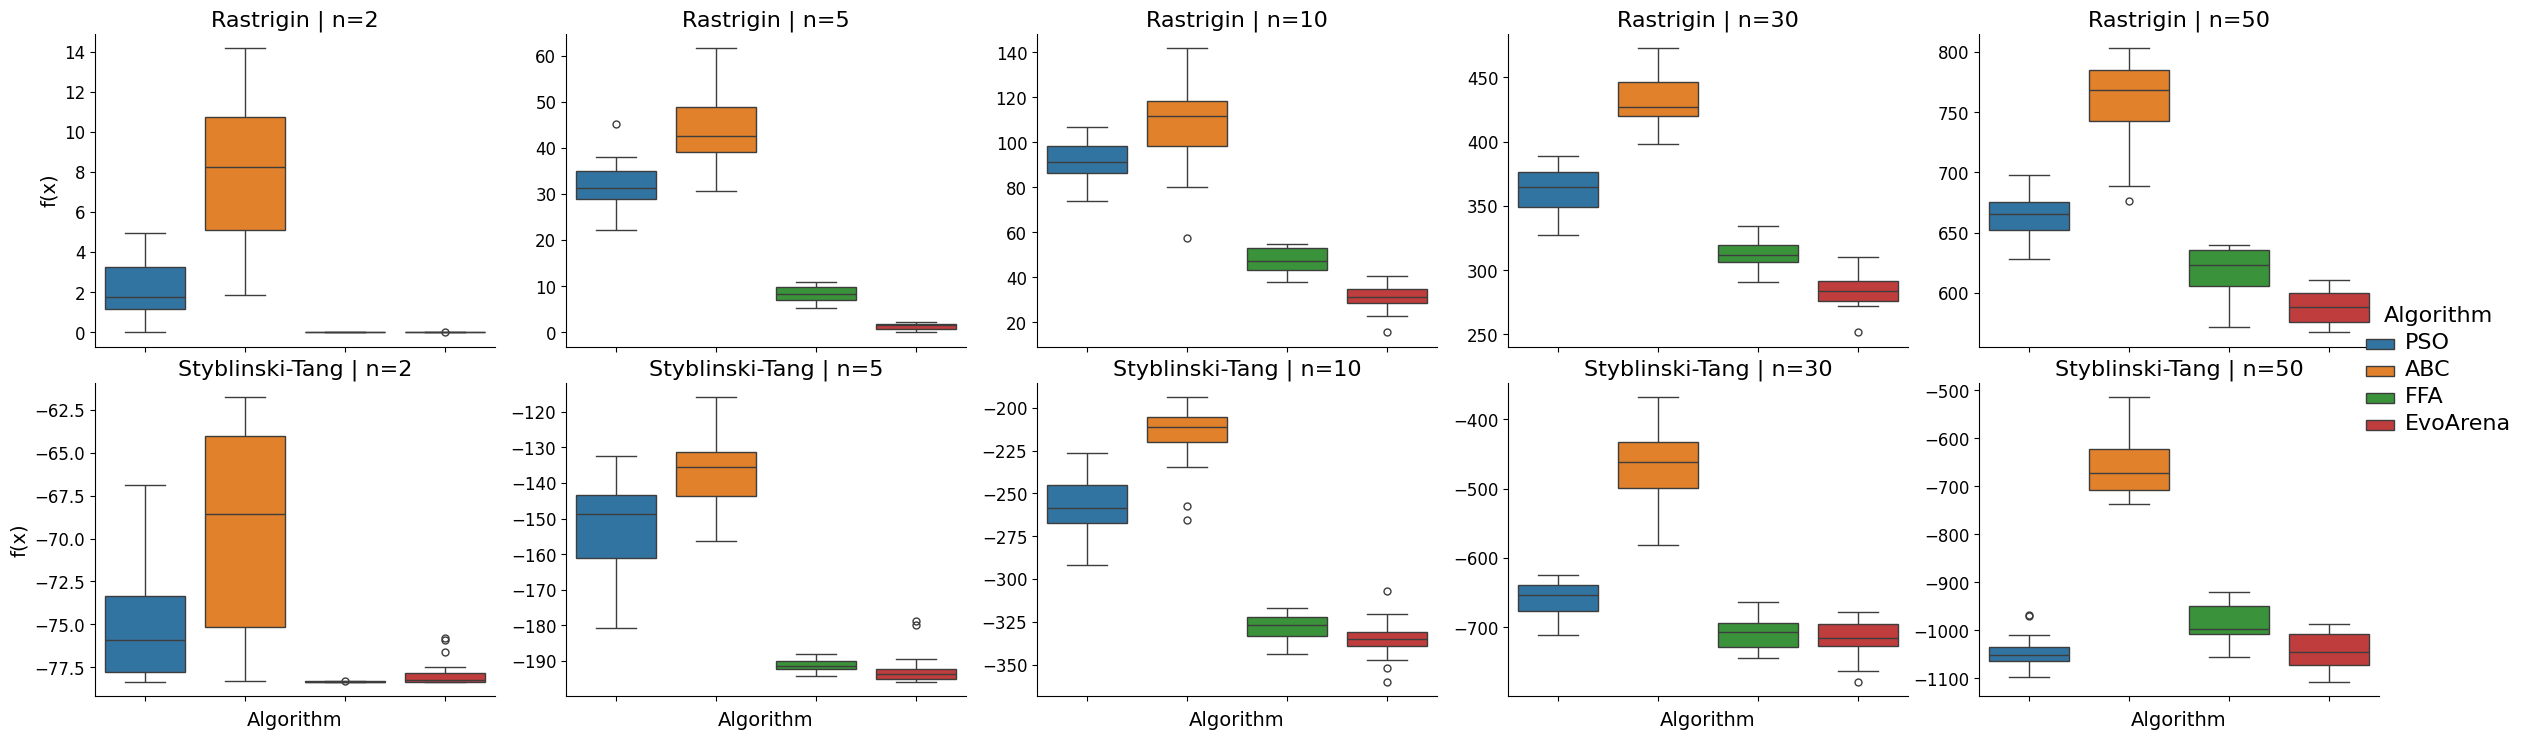

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Base plot
g = sns.catplot(
    data=df,
    kind="box",
    x="Algorithm", y="f(x)",
    row="Problem", col="n",
    hue="Algorithm",
    sharey=False,
    height=4, aspect=1.2,
    legend=True
)

# 1) Bigger facet titles
g.set_titles(row_template="{row_name}", col_template="n={col_name}", size=16)

# 2) Axis labels
g.set_xlabels("Algorithm", fontsize=14)
g.set_ylabels("f(x)", fontsize=14)

# 3) Tick labels
g.set_xticklabels(rotation=45, size=12)
for ax in g.axes.flatten():
    ax.tick_params(axis="y", labelsize=12)

# 4) Legend
leg = g._legend
leg.set_title("Algorithm", prop={"size": 16})
for text in leg.texts:
    text.set_fontsize(16)

# 5) Final layout
g.fig.subplots_adjust(top=0.9)
# g.fig.suptitle("Best Solution Distribution by Algorithm", fontsize=16)

plt.savefig("box_plot.jpg", dpi=300)
plt.show()
